# Partitioning a dataset

Remember that comparing predictions to true labels in the test set can be understood as the unbiased performance evaluation of our model before we let it loose on the real world.

For this session, we will use the Wine dataset that is another open-source dataset that is available from the UCI machine learning repository [wine](https://archive.ics.uci.edu/ml/datasets/Wine) it consists of 178 wine samples with 13 features describing their different chemical properties. The samples belong to one of three different classes, $1$, $2$, and $3$, which refer to the three different types of grape grown in the same region in Italy but derived from different wine cultivars

In [1]:
import pandas as pd
import numpy as np

# using pandas read directly from the UCI ML respository
# df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

#use in local
df_wine = pd.read_csv('datasets/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavonoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavonoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


A convenient way to randomly partition this dataset into separate test and training datasets is to use the train_test_split function from scikit-learn's model_selection submodule. Providing the class label array $y$ as an argument to *stratify* ensures that both training and test datasets have the same class proportions as the original dataset.

In [2]:
from sklearn.model_selection import train_test_split


X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)  #70 - 30

# Scaling Features

Feature scaling is a crucial step in our preprocessing pipeline that can easily be forgotten. The majority of machine learning and optimization algorithms behave much better if features are on the same scale.

> The importance of feature scaling can be illustrated by a simple example. Let's assume that we have two features where one feature is measured on a scale from 1 to 10 and the second feature is measured on a scale from 1 to 100,000, respectively. When we think of the squared error function in Adaline. t is intuitive to say that the algorithm will mostly be busy optimizing the weights according to the larger errors in the second feature.

There are two common approaches to bring different features onto the same scale: **normalization** and **standardization**. **Normalization** refers to the rescaling of the features to a range of $[0, 1]$, which is a special case of min-max scaling. To normalize our data, we can simply apply the min-max scaling to each feature column, where the new value $x_{norm}^{(i)}$ of a sample $x^{(i)}$ can be calculated as follows:

\begin{equation*}
x_{norm}^{(i)} = \frac{x^{(i)} - x_{min}}{x_{max} - x_{min}}
\end{equation*}

Here, $x^{(i)}$ is a particular sample, $x_{min}$ is the smallest value in a feature column, and $x_{max}$ the largest value.

In [5]:
from sklearn.preprocessing import MinMaxScaler  # using the MinMaxScaler class from scikit-learn

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print(X_train, X_train_norm)

[[1.362e+01 4.950e+00 2.350e+00 ... 9.100e-01 2.050e+00 5.500e+02]
 [1.376e+01 1.530e+00 2.700e+00 ... 1.250e+00 3.000e+00 1.235e+03]
 [1.373e+01 1.500e+00 2.700e+00 ... 1.190e+00 2.710e+00 1.285e+03]
 ...
 [1.388e+01 5.040e+00 2.230e+00 ... 5.800e-01 1.330e+00 4.150e+02]
 [1.196e+01 1.090e+00 2.300e+00 ... 9.900e-01 3.130e+00 8.860e+02]
 [1.270e+01 3.870e+00 2.400e+00 ... 1.190e+00 3.130e+00 4.630e+02]] [[0.64619883 0.83201581 0.4248366  ... 0.45744681 0.28571429 0.19400856]
 [0.6871345  0.15612648 0.65359477 ... 0.81914894 0.63369963 0.68259629]
 [0.67836257 0.15019763 0.65359477 ... 0.75531915 0.52747253 0.71825963]
 ...
 [0.72222222 0.84980237 0.34640523 ... 0.10638298 0.02197802 0.09771755]
 [0.16081871 0.06916996 0.39215686 ... 0.54255319 0.68131868 0.43366619]
 [0.37719298 0.61857708 0.45751634 ... 0.75531915 0.68131868 0.13195435]]


Although normalization via min-max scaling is a commonly used technique that is useful when we need values in a bounded interval, standardization can be more practical for many machine learning algorithms, especially for optimization algorithms such as gradient descent.

The reason is that many linear models, such as the logistic regression and SVM initialize the weights to 0 or small random values close to 0.

Using standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns have the same parameters as a standard normal distribution (zero mean and unit variance), which makes it easier to learn the weights. Furthermore, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values.

The procedure for standardization can be expressed by the following equation:

\begin{equation*}
x_{std}^{(i)} = \frac{x^{(i)} - \mu_x}{\sigma_x}
\end{equation*}

Here, $\mu_x$ is the sample mean of a particular feature column and $\sigma_x$ is the corresponding standard deviation.

The following table illustrates the difference between *standarization* and *normalizaion*:


|Input | Standardized | Min-Max normalized |
|:-----|:-------------|:-------------------|
|0.0   |-1.46385      |0.0                 |
|1.0   |-0.87831      |0.2                 |
|2.0   |-0.29277      |0.4                 |
|3.0   |0.29277       |0.5                 |
|4.0   |0.87831       |0.6                 |
|5.0   |1.46385       |1.0                 |


In [4]:
# standardization and normalization manually
ex = np.array([0, 1, 2, 3, 4, 5])
print('standardized:', (ex - ex.mean()) / ex.std())
print('Normalized: ', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
Normalized:  [0.  0.2 0.4 0.6 0.8 1. ]


In [5]:
# scikit-learn standardization
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Selecting meaningful features

If we notice that a model performs much better on a training dataset than on the test dataset, this observation is a strong indicator of **overfitting**. overfitting means the model fits the parameters too closely with regard to the particular observations in the training dataset, but does not generalize well to new data, and we say the model has a **high variance**.  The reason for the overfitting is that our model is too complex for the given training data. Common solutions to reduce the generalization error are listed as follows:
* Collect more training data
* Introduce a penalty for complexity via regularization
* Choose a simpler model with fewer parameters
* Reduce the dimensionality of the data

### L1 and L2 regularization as penalties against model complexity

L2 regularization is one approach to reduce the complexity of a model by penalizing large individual weights, where we defined the L2 norm of our weight vector w as follows:

\begin{equation*}
L2 : \| w \|_2^2 = \sum_{j=1}^m w_j^2
\end{equation*}

Another approach to reduce the model complexity is the related L1 regularization:

\begin{equation*}
L1: \| w \|_1 = \sum_{j=1}^m \left| w_j \right|
\end{equation*}

In contrast to L2 regularization, L1 regularization usually yields sparse feature vectors; most feature weights will be zero. Sparsity can be useful in practice if we have a high-dimensional dataset with many features that are irrelevant, especially cases where we have more irrelevant dimensions than samples. In this sense, L1 regularization can be understood as a technique for feature selection.

## Geometric interpretation of L2 regularization

As mentioned, L2 regularization adds a penalty term to the cost function that effectively results in less extreme weight values compared to a model trained with an unregularized cost function.

For understanding, Let us plot the contours of a convex cost function for two weight coefficients $w_1$ and $w_2$. Here, we will consider the Sum of **Squared Errors (SSE)** cost function that we used for Adaline. Since it is spherical and easier to draw than the cost function of logistic regression; however, the same concepts apply to the latter. Remember that our goal is to find the combination of weight coefficients that minimize the cost function for the training data, as shown in the following figure (the point in the center of the ellipses):

<img src="images/L2_regularization1.jpg" alt="L2 Regularization" title="L2 Regularization" height="300" width="450">

Now, we can think of regularization as adding a penalty term to the cost function to encourage smaller weights; or in other words, we penalize large weights. Thus, by increasing the regularization strength via the regularization parameter $\lambda$, we shrink the weights towards zero and decrease the dependence of our model on the training data.

<img src="images/L2_regularization2.jpg" alt="L2 Regularization" title="L2 Regularization" height="300" width="450">

The quadratic L2 regularization term is represented by the shaded ball. Here, our weight coefficients cannot exceed our regularization budget—the combination of the weight coefficients cannot fall outside the shaded area. On the other hand, we still want to minimize the cost function. Under the penalty constraint, our best effort is to choose the point where the L2 ball intersects with the contours of the unpenalized cost function. The larger the value of the regularization parameter $\lambda$ gets, the faster the penalized cost grows, which leads to a narrower L2 ball.

To summarize the main message of the example, our goal is to minimize the sum of the unpenalized cost plus the penalty term, which can be understood as adding bias and preferring a simpler model to reduce the variance in the absence of sufficient training data to fit the model.

## Sparse solutions with L1 regularization

he main concept behind L1 regularization is similar to what we have discussed in the previous section. However, since the L1 penalty is the sum of the absolute weight coefficients (remember that the L2 term is quadratic), we can represent it as a diamond-shape budget, as shown in the following figure:

<img src="images/L1_regularization1.jpg" alt="L2 Regularization" title="L2 Regularization" height="300" width="450">

In the preceding figure, we can see that the contour of the cost function touches the L1 diamond at $w_1 = 0$ . Since the contours of an L1 regularized system are sharp, it is more likely that the optimum—that is, the intersection between the ellipses of the cost function and the boundary of the L1 diamond—is located on the axes, which encourages sparsity.

Applied to the standardized Wine data, the L1 regularized logistic regression would yield the following sparse solution

In [6]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(penalty='l1', C=1.0, multi_class='auto')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy_ ', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy_  1.0


/home/raziel/.virtualenvs/PythonMachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Both training and test accuracies (both 100 percent) indicate that our model does a perfect job on both datasets. When we access the intercept terms via the lr.intercept_ attribute, we can see that the array returns three values:

In [7]:
lr.intercept_

array([-1.26340757, -1.21608866, -2.37027025])

Since we fit the LogisticRegression object on a multiclass dataset, it uses the One-versus-Rest (OvR) approach by default, where the first intercept belongs to the model that fits class 1 versus class 2 and 3, the second value is the intercept of the model that fits class 2 versus class 1 and 3, and the third value is the intercept of the model that fits class 3 versus class 1 and 2:

In [8]:
lr.coef_

array([[ 1.24599579,  0.18078796,  0.74165548, -1.1591664 ,  0.        ,
         0.        ,  1.17785683,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54020356,  2.51113455],
       [-1.53687703, -0.38705836, -0.99519505,  0.36491543, -0.05944192,
         0.        ,  0.66804016,  0.        ,  0.        , -1.93429337,
         1.23426384,  0.        , -2.23248446],
       [ 0.13504129,  0.16932585,  0.35773299,  0.        ,  0.        ,
         0.        , -2.43411363,  0.        ,  0.        ,  1.56304296,
        -0.81820656, -0.49582999,  0.        ]])

The weight array that we accessed via the lr.coef_ attribute contains three rows of weight coefficients, one weight vector for each class. Each row consists of 13 weights where each weight is multiplied by the respective feature in the 13-dimensional Wine dataset to calculate the net input:

\begin{equation*}
z = w_1x_1 + \dots + w_mx_m = \sum_{j=0}^m x_jw_j = w^Tx
\end{equation*}

> In scikit-learn, $w_0$ corresponds to the *intercept_* and $w_j$ with $j > 0$ correspond to the values in *coef_*.

As a result of L1 regularization, which serves as a method for feature selection, we just trained a model that is robust to the potentially irrelevant features in this dataset.

In the last example on regularization, we will vary the regularization strength and plot the regularization path—the weight coefficients of the different features for different regularization strengths:

/home/raziel/.virtualenvs/PythonMachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/raziel/.virtualenvs/PythonMachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/raziel/.virtualenvs/PythonMachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/raziel/.virtualenvs/PythonMachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/raziel/.virtualenvs/PythonMachineLearn

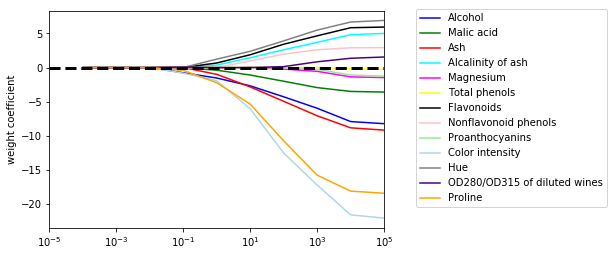

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 
          'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0, multi_class='auto')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append((10**c))
    
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],label=df_wine.columns[column + 1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

The resulting plot provides us with further insights into the behavior of L1 regularization. As we can see, all feature weights will be zero if we penalize the model with a strong regularization parameter ($C < 0.1$); $C$ is the inverse of the regularization parameter $\lambda$.

## Sequential feature selection algorithms

An alternative way to reduce the complexity of the model and avoid overfitting is **dimensionality reduction** via feature selection, which is especially useful for unregularized models. There are two main categories of dimensionality reduction techniques: **feature selection** and **feature extraction**. Via feature selection, we select a subset of the original features, whereas in feature extraction, we derive information from the feature set to construct a new feature subspace.

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where $k<d$. The motivation behind feature selection algorithms is to automatically select a subset of features that are most relevant to the problem.

A classic sequential feature selection algorithm is Sequential Backward Selection (SBS), which aims to reduce the dimensionality of the initial feature subspace with a minimum decay in performance of the classifier to improve upon computational efficiency. 

The idea behind the SBS algorithm is quite simple: SBS sequentially removes features from the full feature subset until the new feature subspace contains the desired number of features. In order to determine which feature is to be removed at each stage, we need to define the criterion function J that we want to minimize. The criterion calculated by the criterion function can simply be the difference in performance of the classifier before and after the removal of a particular feature. Then, the feature to be removed at each stage can simply be defined as the feature that maximizes this criterion; or in more intuitive terms, at each stage we eliminate the feature that causes the least performance loss after removal. Based on the preceding definition of SBS, we can outline the algorithm in four simple steps:

1. Initialize the algorithm with $k=d$, where $d$ is the dimensionality of the full feature space $X_d$.
2. Determine the feature $x^{\_}$ that maximizes the criterion: $x^{\_} = argmax J \left( X_k - x \right)$, where $x \in X_k$.
3. Remove the feature $x^{\_}$ from the feature set: $X_{k-1} := X_k - x^{\_}; k:= k - 1$.
4. Terminate if $k$ equals the number of desired features; otherwise, go to step 2.

Let us go ahead and implement it in Python from scratch:

In [10]:
# %load sbs_algorithm.py
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                            random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_scores(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_scores(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_scores(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

let us see our SBS implementation in action using the KNN classifier from scikit-learn:

In [11]:
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

The SBS fit method will then create new training subsets for testing (validation) and training, which is why this test set is also called the **validation dataset**. This approach is necessary to prevent our **original** test set from becoming part of the training data.

Remember that our SBS algorithm collects the scores of the best feature subset at each stage, so let us move on to the more exciting part of our implementation and plot the classification accuracy of the KNN classifier that was calculated on the validation dataset. The code is as follows:

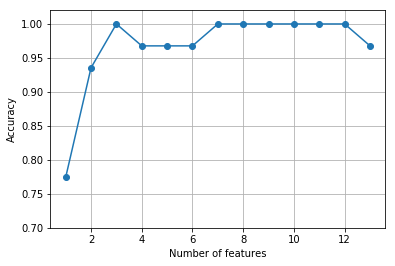

In [13]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

As we can see, the accuracy of the KNN classifier improved on the validation dataset as we reduced the number of features, which is likely due to a decrease in the curse of dimensionality that we discussed in the context of the KNN algorithm. We can see that the classifier achieved 100 percent accuracy for $k=\{ 3, 7, 8, 9, 10, 11, 12 \}$. let's see what the smallest feature subset ($k=3$) that yielded such a good performance on the validation dataset looks like:

In [14]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


Next let's evaluate the performance of the KNN classifier on the original test set:

In [15]:
knn.fit(X_train_std, y_train)
print('Training accuracy', knn.score(X_train_std, y_train))

Training accuracy 0.967741935483871


In [16]:
print('Test accuracy:', knn.score(X_test_std, y_test))

Test accuracy: 0.9629629629629629


Now, let us use the selected three-feature subset and see how well KNN performs:

In [18]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy: ', knn.score(X_train_std[:, k3], y_train))

Training accuracy:  0.9516129032258065


While we did not increase the performance of the KNN model by reducing the number of features, we shrank the size of the dataset, which can be useful in real-world applications that may involve expensive data collection steps. Also, by substantially reducing the number of features, we obtain simpler models, which are easier to interpret.